Saving road_accident_dataset.xlsb to road_accident_dataset (2).xlsb
Data Summary:
             Country           Year          Month    Day of Week  \
count  132000.000000  132000.000000  132000.000000  132000.000000   
mean        5.480833    2011.973348       5.507652       3.007182   
std         2.874533       7.198624       3.448939       2.002281   
min         0.000000    2000.000000       0.000000       0.000000   
25%         3.000000    2006.000000       3.000000       1.000000   
50%         5.000000    2012.000000       6.000000       3.000000   
75%         8.000000    2018.000000       8.000000       5.000000   
max        10.000000    2024.000000      11.000000       6.000000   

         Time of Day    Urban/Rural      Road Type  Weather Conditions  \
count  132000.000000  132000.000000  132000.000000       132000.000000   
mean        1.502197       0.496197       0.999720            2.003879   
std         1.119330       0.499987       0.815585            1.415804   


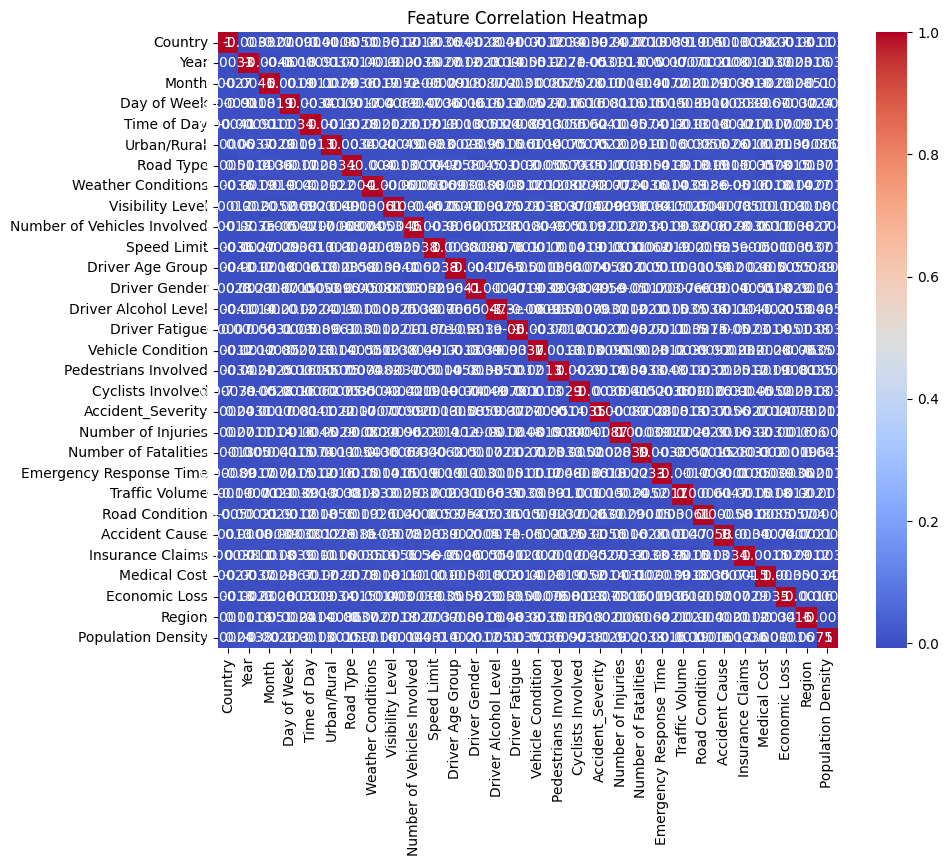

Features: ['Country', 'Year', 'Month', 'Day of Week', 'Time of Day', 'Urban/Rural', 'Road Type', 'Weather Conditions', 'Visibility Level', 'Number of Vehicles Involved', 'Speed Limit', 'Driver Age Group', 'Driver Gender', 'Driver Alcohol Level', 'Driver Fatigue', 'Vehicle Condition', 'Pedestrians Involved', 'Cyclists Involved', 'Accident_Severity', 'Number of Injuries', 'Number of Fatalities', 'Emergency Response Time', 'Traffic Volume', 'Road Condition', 'Accident Cause', 'Insurance Claims', 'Medical Cost', 'Economic Loss', 'Region']
Target: Population Density
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0


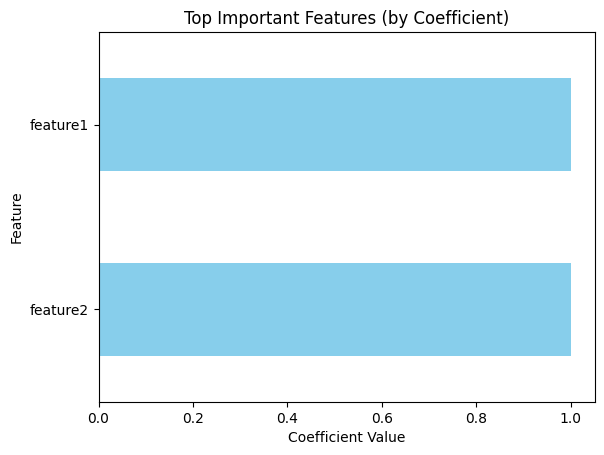

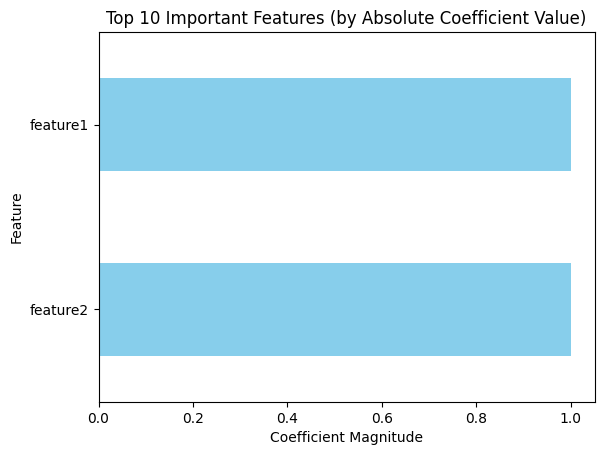

In [ ]:
# STEP 1: Upload your .xlsb file
from google.colab import files
uploaded = files.upload()  # Select your file: road_accident_dataset.xlsb
# STEP 2: Install the package to read .xlsb files
!pip install pyxlsb
# STEP 3: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
# STEP 4: Load the .xlsb file
df = pd.read_excel('road_accident_dataset.xlsb', engine='pyxlsb')
df.head()
# STEP 5: Basic Preprocessing
# Drop missing values
df = df.dropna()

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()
# STEP 6: Exploratory Data Analysis
print("Data Summary:")
print(df.describe())

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
# STEP 7: Split Features and Target
# Assuming last column is the target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print("Features:", X.columns.tolist())
print("Target:", y.name)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Sample dataset
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 4, 3, 2, 1],
    'target': [1, 3, 5, 7, 9]
})

# Split features and target
X = data[['feature1', 'feature2']]
y = data['target']

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))

# Plot top features
coefficients = pd.Series(model.coef_, index=X.columns)
coefficients.abs().nlargest(2).plot(kind='barh', color='skyblue')
plt.title("Top Important Features (by Coefficient)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

coefficients = pd.Series(model.coef_, index=X.columns)
coefficients.abs().nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Important Features (by Absolute Coefficient Value)")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.show()


